# Stock Analysis (Monte-Carlo, build portfolio)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime

In [3]:
 #Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [4]:
# Four company for data extraction
company_list = ['TWTR', 'TSLA', 'MSFT', 'AMZN']

In [5]:
#globals()- taking the string and makes it a global variable
for company in company_list:
    globals()[company] = data.DataReader(company, 'yahoo', year_ago, today)

In [6]:
TWTR.head(5)

High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2021-07-06  70.930000  69.230003  69.349998  70.209999  12317400  70.209999
2021-07-07  70.849998  68.709999  70.629997  68.760002  10609300  68.760002
2021-07-08  67.610001  66.239998  67.000000  66.830002  12782500  66.830002
2021-07-09  69.010002  66.980003  67.070000  68.970001  14393700  68.970001
2021-07-12  70.440002  68.800003  69.459999  69.860001   9223600  69.860001

In [7]:
TSLA.head(5)

High         Low        Open       Close    Volume  \
Date                                                                   
2021-07-06  684.000000  651.400024  681.710022  659.580017  23284500   
2021-07-07  665.700012  638.320007  664.270020  644.650024  18792000   
2021-07-08  654.429993  620.460022  628.369995  652.809998  22773300   
2021-07-09  658.909973  644.690002  653.179993  656.950012  18140500   
2021-07-12  687.239990  662.159973  662.200012  685.700012  25927000   

             Adj Close  
Date                    
2021-07-06  659.580017  
2021-07-07  644.650024  
2021-07-08  652.809998  
2021-07-09  656.950012  
2021-07-12  685.700012

In [8]:
MSFT.head(5)

High         Low        Open       Close      Volume  \
Date                                                                     
2021-07-06  279.369995  274.299988  278.029999  277.660004  31565600.0   
2021-07-07  280.690002  277.149994  279.399994  279.929993  23260000.0   
2021-07-08  278.730011  274.869995  276.899994  277.420013  24618600.0   
2021-07-09  278.049988  275.320007  275.720001  277.940002  23916700.0   
2021-07-12  279.769989  276.579987  279.160004  277.320007  18931700.0   

             Adj Close  
Date                    
2021-07-06  275.411133  
2021-07-07  277.662720  
2021-07-08  275.173065  
2021-07-09  275.688843  
2021-07-12  275.073883

In [9]:
AMZN.head(5)

High         Low        Open       Close       Volume  \
Date                                                                      
2021-07-06  184.274002  176.449997  176.505493  183.787003  134896000.0   
2021-07-07  186.710007  183.945496  185.869003  184.828995  106562000.0   
2021-07-08  187.999496  181.056000  182.177994  186.570496  103612000.0   
2021-07-09  187.399994  184.669998  186.126007  185.966995   74964000.0   
2021-07-12  187.864502  184.839493  187.199997  185.927505   51432000.0   

             Adj Close  
Date                    
2021-07-06  183.787003  
2021-07-07  184.828995  
2021-07-08  186.570496  
2021-07-09  185.966995  
2021-07-12  185.927505

In [10]:
TWTR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-07-06 to 2022-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    int64  
 5   Adj Close  251 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


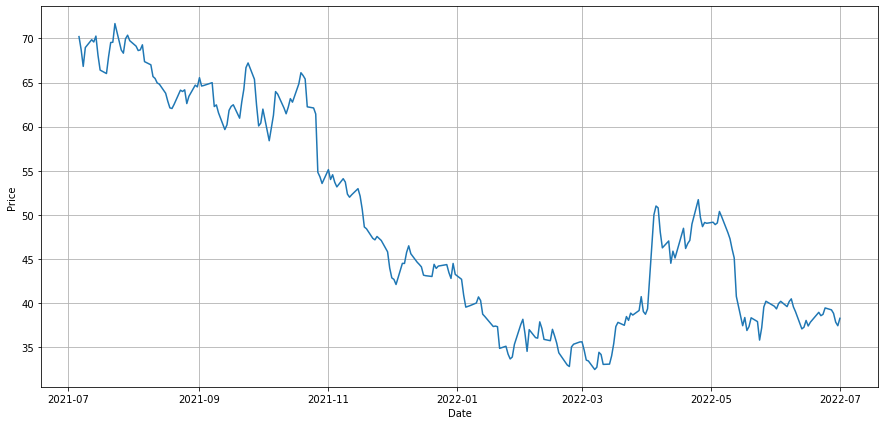

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(TWTR['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

<AxesSubplot:xlabel='Date'>

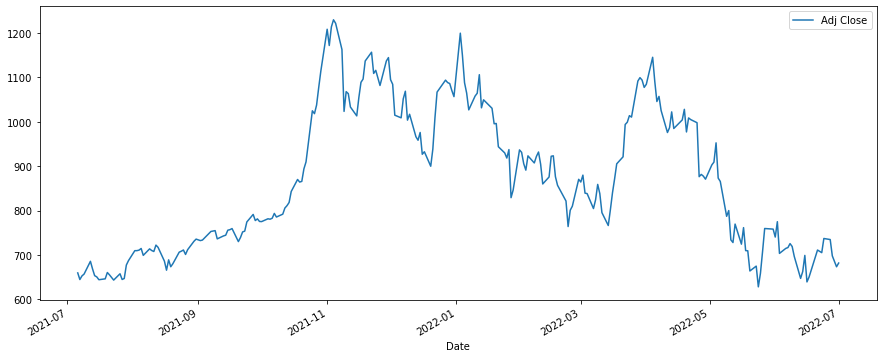

In [12]:
TSLA['Adj Close'].plot(legend=True, figsize=(15, 6))

## Moving average

In [13]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    TWTR[ma_str] = TWTR['Adj Close'].rolling(ma).mean()
    TSLA[ma_str] = TSLA['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()

In [14]:
TWTR.head()

High        Low       Open      Close    Volume  Adj Close  \
Date                                                                          
2021-07-06  70.930000  69.230003  69.349998  70.209999  12317400  70.209999   
2021-07-07  70.849998  68.709999  70.629997  68.760002  10609300  68.760002   
2021-07-08  67.610001  66.239998  67.000000  66.830002  12782500  66.830002   
2021-07-09  69.010002  66.980003  67.070000  68.970001  14393700  68.970001   
2021-07-12  70.440002  68.800003  69.459999  69.860001   9223600  69.860001   

            MA: 10  MA: 20  MA: 30  
Date                                
2021-07-06     NaN     NaN     NaN  
2021-07-07     NaN     NaN     NaN  
2021-07-08     NaN     NaN     NaN  
2021-07-09     NaN     NaN     NaN  
2021-07-12     NaN     NaN     NaN

In [15]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

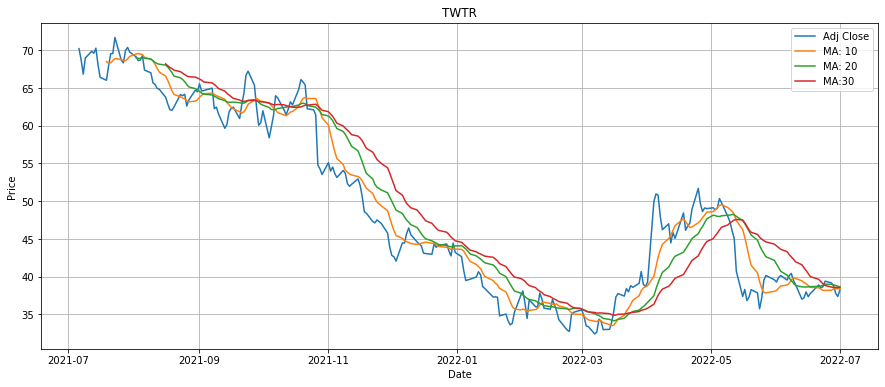

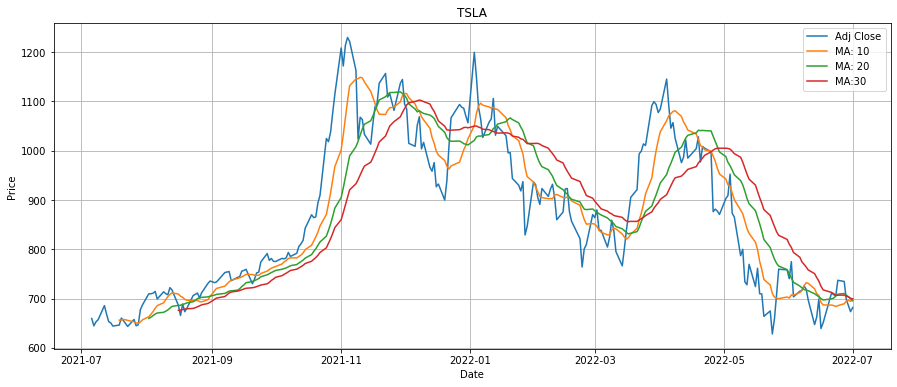

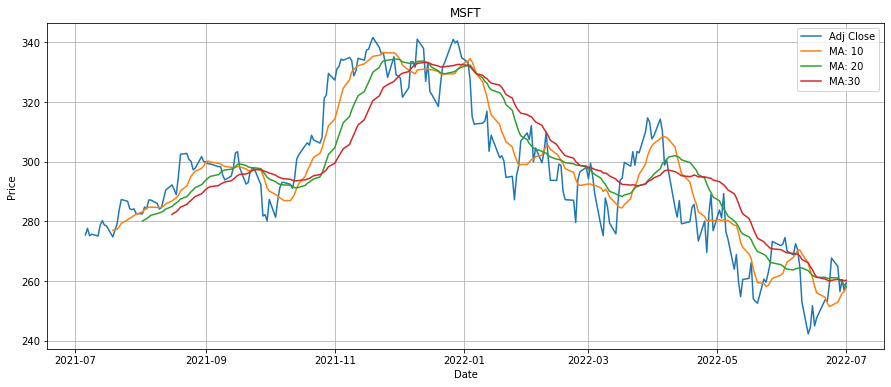

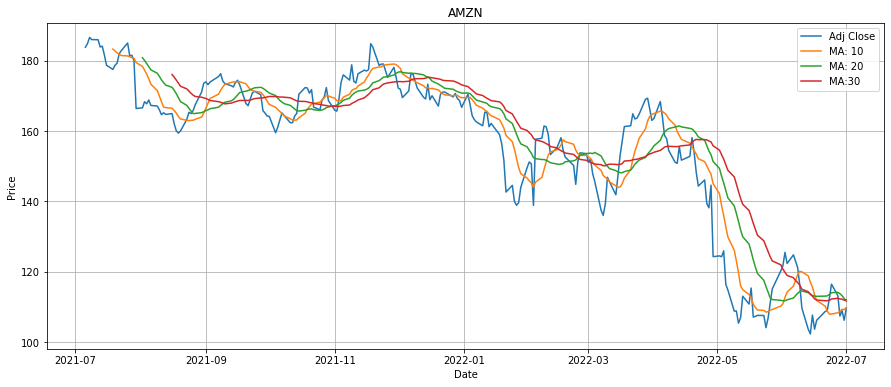

In [16]:
data_list = [TWTR, TSLA, MSFT, AMZN]

for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

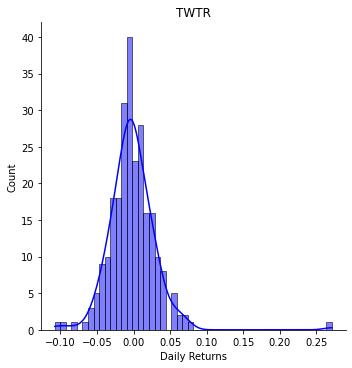

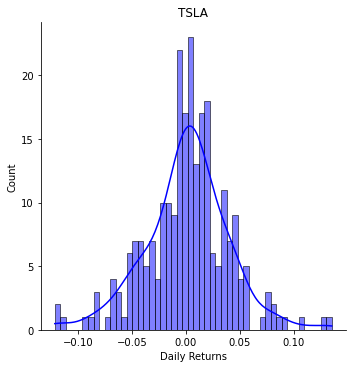

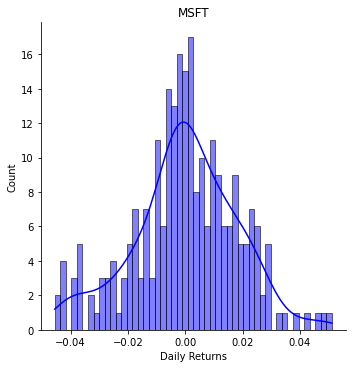

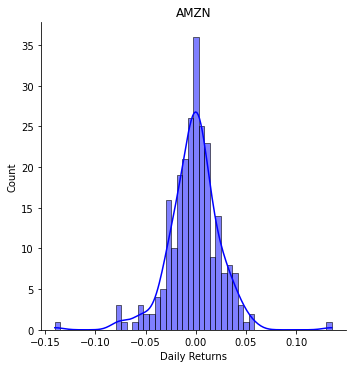

In [17]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

## Correlation between stock returns

In [18]:
# Create dataframe with stock returns
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns.head()

TWTR      TSLA      MSFT      AMZN
0       NaN       NaN       NaN       NaN
1 -0.020652 -0.022636  0.008175  0.005670
2 -0.028069  0.012658 -0.008966  0.009422
3  0.032022  0.006342  0.001874 -0.003235
4  0.012904  0.043763 -0.002231 -0.000212

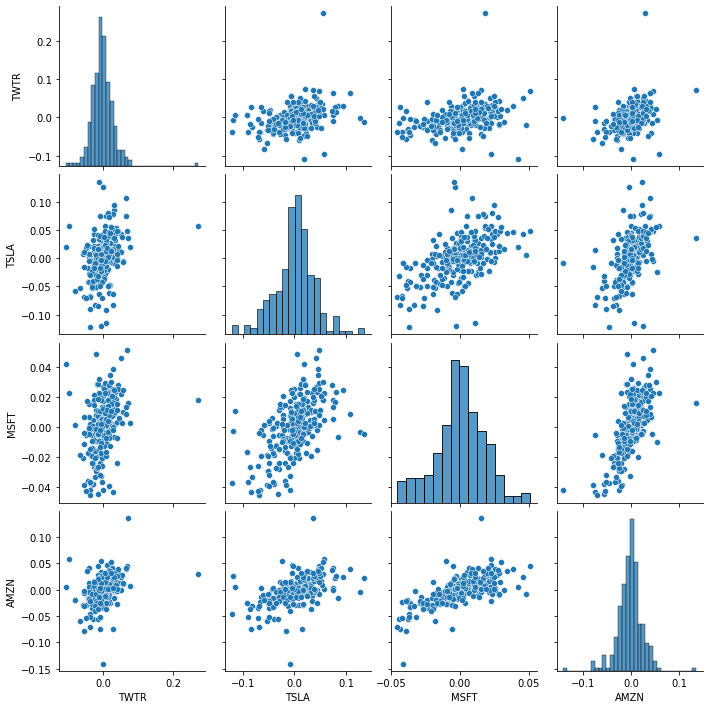

In [19]:
sns.pairplot(stock_returns.dropna())

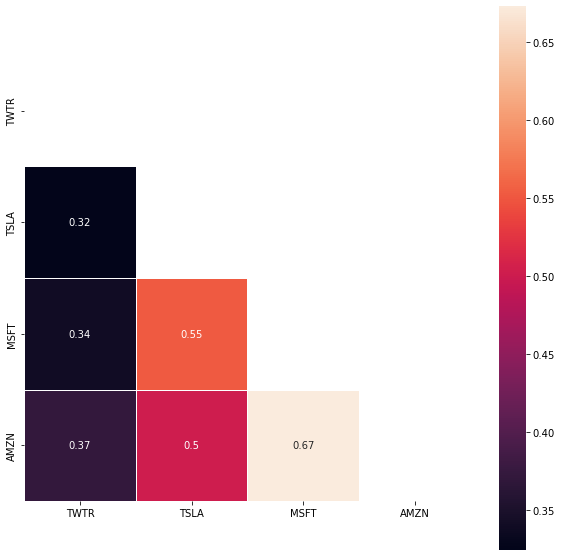

In [20]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [21]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

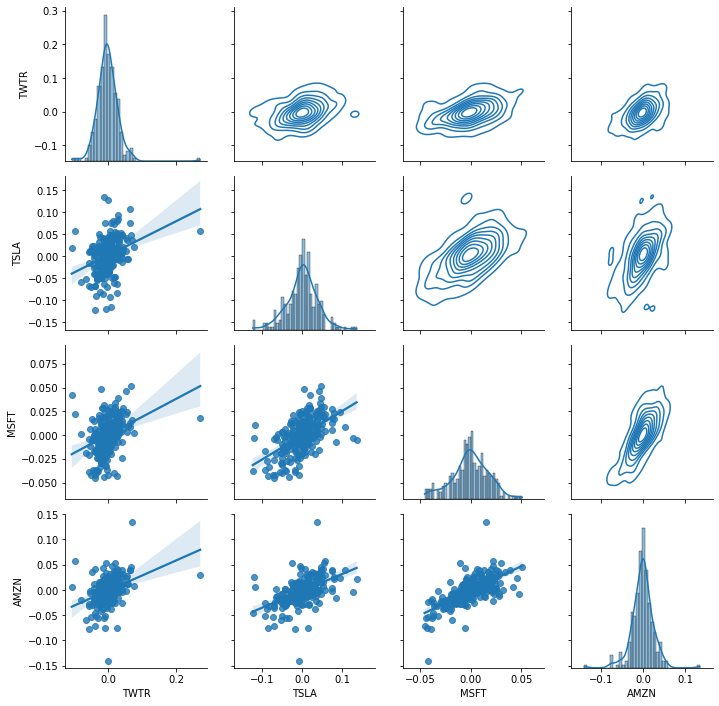

In [22]:
draw_jointplot(stock_returns)

# Portfolio strategy

Let's try to make an optimal portfolio of four stocks. Following the classical theory, it is necessary to minimize risk and maximize profitability. We will generate random ratios of stocks, calculate the risk and profitability of each portfolio according to the given formulas.

The expected return of the portfolio is the total expected return of the securities included in it, weighted taking into account their share in the portfolio.

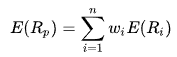

The basic formula for calculating risk is based on the relationship between the shares in the portfolio and the covariance associated with each of the securities in the portfolio.




In [25]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

TWTR   -0.001921
TSLA    0.000887
MSFT   -0.000074
AMZN   -0.001726
dtype: float64
          TWTR      TSLA      MSFT      AMZN
TWTR  0.001059  0.000410  0.000200  0.000315
TSLA  0.000410  0.001508  0.000387  0.000508
MSFT  0.000200  0.000387  0.000326  0.000316
AMZN  0.000315  0.000508  0.000316  0.000678


In [26]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [27]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [28]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

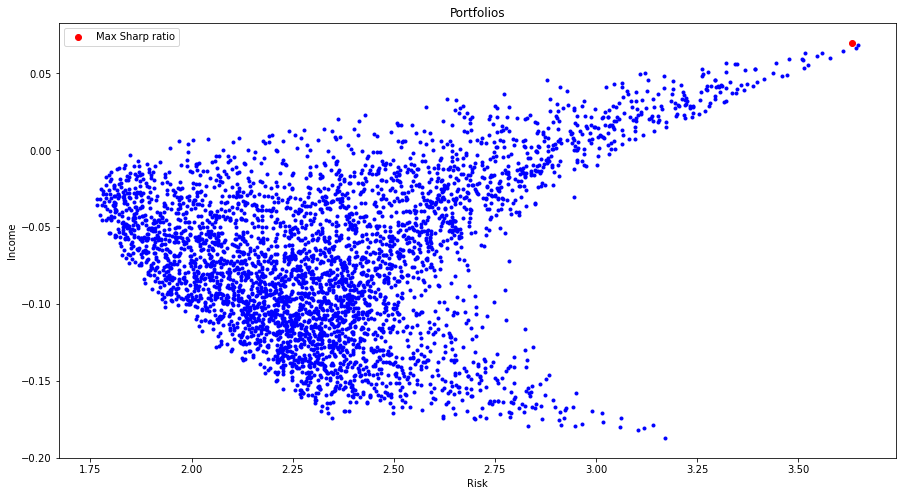

In [29]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [30]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

TWTR : 0.019864186094340208
TSLA : 0.9081758130629558
MSFT : 0.03444634646183246
AMZN : 0.037513654380871654


## Try to predict price behavior with method Monte Carlo

In [31]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [32]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [33]:
TWTR.tail()

High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2022-06-27  39.880001  38.900002  39.669998  39.189999  7147800  39.189999   
2022-06-28  39.709999  38.650002  39.209999  38.790001  6055100  38.790001   
2022-06-29  38.779999  37.639999  38.759998  37.799999  7178600  37.799999   
2022-06-30  38.020000  36.990002  37.529999  37.389999  7133100  37.389999   
2022-07-01  38.240002  37.080002  37.380001  38.230000  6298000  38.230000   

            MA: 10   MA: 20     MA: 30  Daily Returns  
Date                                                   
2022-06-27  38.210  38.9940  38.634666      -0.005582  
2022-06-28  38.386  38.9250  38.570333      -0.010207  
2022-06-29  38.444  38.8350  38.584000      -0.025522  
2022-06-30  38.384  38.7395  38.553000      -0.010847  
2022-07-01  38.471  38.6555  38.599000       0.022466

Text(0.5, 1.0, 'Monte Carlo analysis for Twitter')

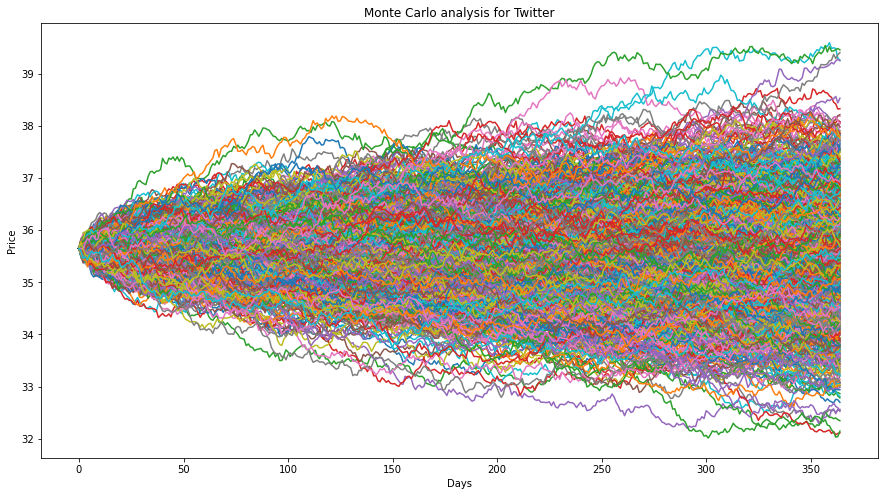

In [34]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Twitter')

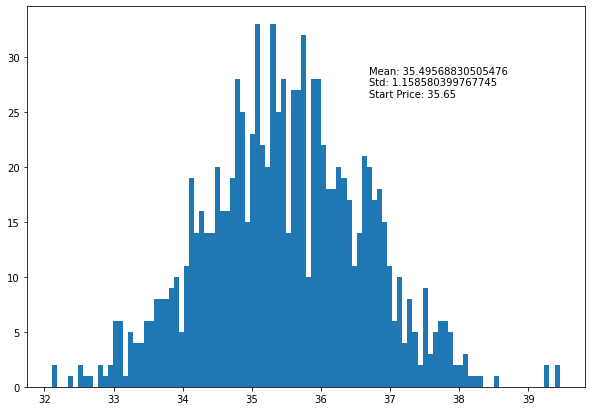

In [35]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Start price was 35.65, mean final price is 35.59. As we can see, final price is lower than start. Although the variance is small

In [36]:
TSLA.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2022-06-27  756.210022  727.700012  748.099976  734.760010  29726100   
2022-06-28  749.909973  697.030029  733.450012  697.989990  30130400   
2022-06-29  693.520020  666.820007  691.500000  685.469971  27632400   
2022-06-30  688.369995  656.590027  673.530029  673.419983  31533500   
2022-07-01  690.690002  666.359985  681.000000  681.789978  24781500   

             Adj Close      MA: 10      MA: 20      MA: 30  Daily Returns  
Date                                                                       
2022-06-27  734.760010  689.492004  710.232001  707.097666      -0.003202  
2022-06-28  697.989990  694.570001  707.150000  704.710999      -0.050044  
2022-06-29  685.469971  696.850000  703.510498  703.414331      -0.017937  
2022-06-30  673.419983  694.291998  700.162997  700.474664      -0.017579  
2022-07-01  681.789978  698.540997  695.502496  699.540664       0.012429

Text(0.5, 1.0, 'Monte Carlo analysis for Tesla')

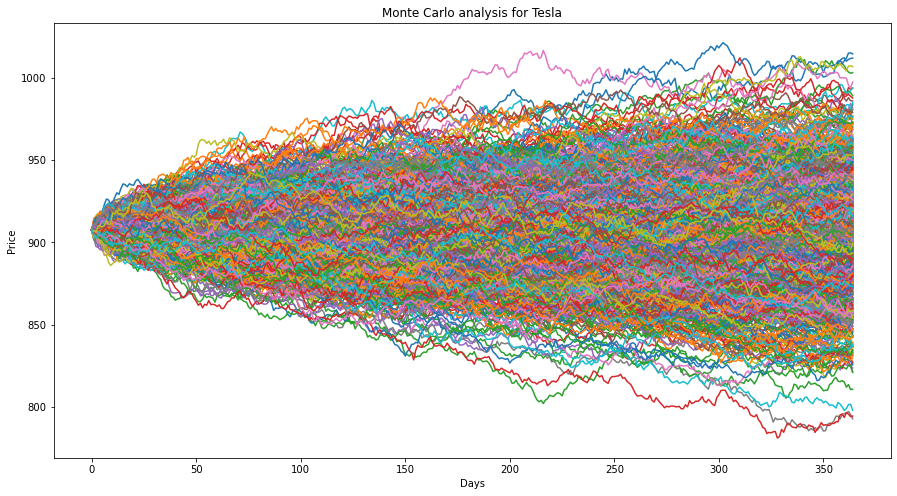

In [37]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Tesla')

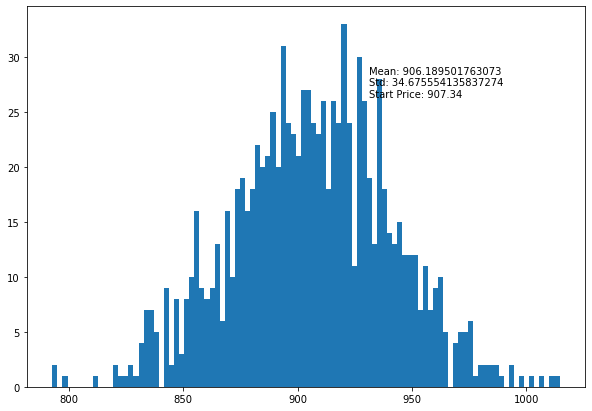

In [38]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

This time it turned out that the final price is more than the initial one. But the variance turned out to be very high. Stocks are considered risky.

In [39]:
MSFT.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2022-06-27  268.299988  263.279999  268.209991  264.890015  24615100.0   
2022-06-28  266.910004  256.320007  263.980011  256.480011  27295500.0   
2022-06-29  261.970001  255.759995  257.589996  260.260010  20069800.0   
2022-06-30  259.529999  252.899994  257.049988  256.829987  31730900.0   
2022-07-01  259.769989  254.610001  256.390015  259.579987  22825200.0   

             Adj Close      MA: 10      MA: 20      MA: 30  Daily Returns  
Date                                                                       
2022-06-27  264.890015  252.945001  261.051000  260.569853      -0.010497  
2022-06-28  256.480011  254.367003  260.213001  260.435412      -0.031749  
2022-06-29  260.260010  255.944003  259.632502  260.414334       0.014738  
2022-06-30  256.829987  256.451003  258.853001  260.101999      -0.013179  
2022-07-01  259.579987  257.912001  258.103001  260.285332       0.010707

Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

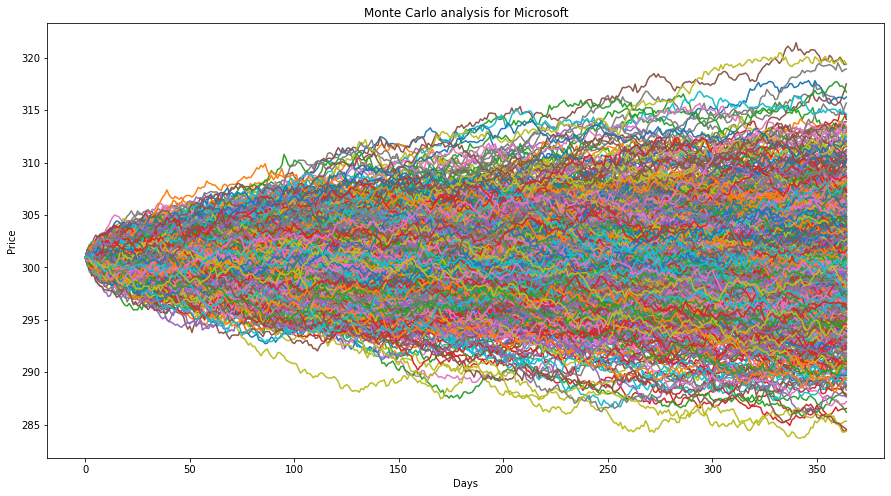

In [40]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

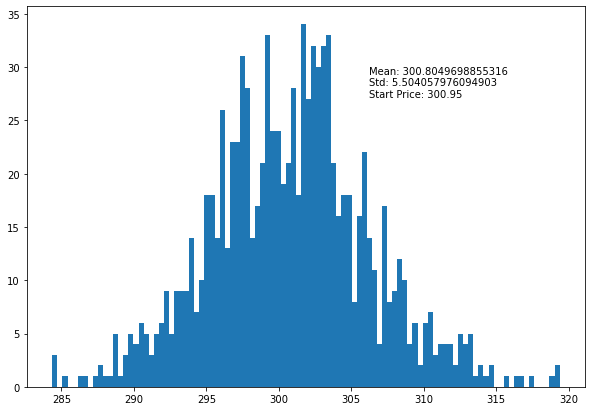

In [41]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The stock looks stable. The final price is more than the initial one. The variance is relatively small

In [42]:
AMZN.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2022-06-27  117.980003  112.699997  117.089996  113.220001  62133200.0   
2022-06-28  114.849998  107.040001  113.500000  107.400002  74942900.0   
2022-06-29  110.989998  106.910004  107.379997  108.919998  66375300.0   
2022-06-30  108.180000  102.519997  108.110001  106.209999  97679400.0   
2022-07-01  109.750000  105.849998  106.290001  109.559998  72952000.0   

             Adj Close   MA: 10      MA: 20      MA: 30  Daily Returns  
Date                                                                    
2022-06-27  113.220001  108.328  114.147550  112.457234      -0.027821  
2022-06-28  107.400002  108.701  113.760225  112.268734      -0.051404  
2022-06-29  108.919998  109.362  113.195750  112.205717       0.014153  
2022-06-30  106.209999  109.216  112.422050  111.900434      -0.024881  
2022-07-01  109.559998  109.806  111.624500  111.982017       0.031541

Text(0.5, 1.0, 'Monte Carlo analysis for Amazon')

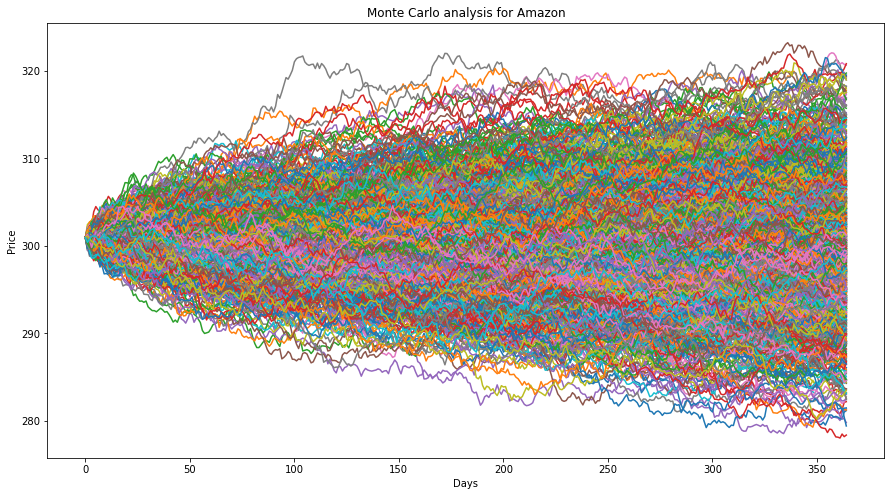

In [43]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AMZN'], sigma['AMZN'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Amazon')

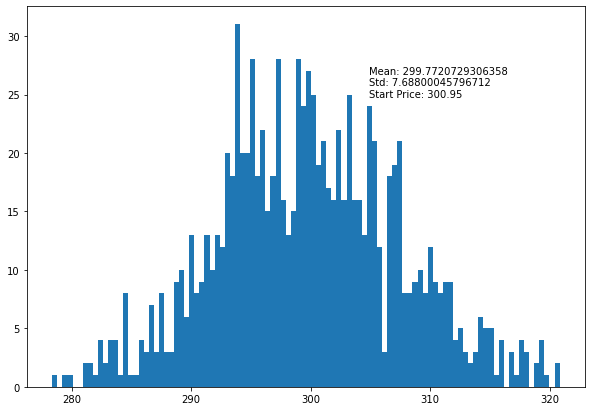

In [44]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The initial and final price are almost the same. The variance is normal. Stocks look stable.